In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
import re
import os
import patsy

from matplotlib.colors import ListedColormap

import sklearn
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import PowerTransformer, RobustScaler, StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN, OPTICS
from esda.adbscan import ADBSCAN
from pysal.model import mgwr
from mgwr.sel_bw import Sel_BW

import random
random.seed(42)    # For reproducibility
np.random.seed(42) # For reproducibility

# Make numeric display a bit neater
pd.set_option('display.float_format', lambda x: '{:,.2f}'.format(x))

In [2]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

In [3]:
pip install mcdm

     |████████████████████████████████| 69 kB 212 kB/s eta 0:00:01
     |████████████████████████████████| 15.7 MB 774 kB/s eta 0:00:01    |▎                               | 122 kB 316 kB/s eta 0:00:50     |█████▋                          | 2.8 MB 619 kB/s eta 0:00:21     |███████                         | 3.5 MB 757 kB/s eta 0:00:17     |████████████████████████▍       | 12.0 MB 995 kB/s eta 0:00:04
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.1
    Uninstalling numpy-1.19.1:
      Successfully uninstalled numpy-1.19.1
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

pointpats 2.2.0 requires opencv-contrib-python>=4.2.0, which is not installed.
access 1.1.1 requires Sphinx==2.4.3, which is not installed.
Note: you 

In [41]:
tfont = {'fontname':'Liberation Sans Narrow', 'horizontalalignment':'left'}
import math
from geopandas import GeoDataFrame
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
import mcdm
from scipy import stats

In [166]:
gba_station=gpd.read_file('final_output/gba_new/gba_station_withcentricity.shp',encoding="utf-8")
dg_station=gpd.read_file('final_output/dg/dg_station_withcentricity.shp',encoding="utf-8")
fs_station=gpd.read_file('final_output/fs/fs_station_withcentricity.shp',encoding="utf-8")
gz_station=gpd.read_file('final_output/gz/gz_station_withcentricity.shp',encoding="utf-8")
sz_station=gpd.read_file('final_output/sz/sz_station_withcentricity.shp',encoding="utf-8")

In [6]:
sz_station.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   id          221 non-null    int64   
 1   line_name   221 non-null    object  
 2   station_na  221 non-null    object  
 3   lng_x       221 non-null    float64 
 4   lat         221 non-null    float64 
 5   lng84       221 non-null    float64 
 6   lat84       221 non-null    float64 
 7   lng_y       221 non-null    float64 
 8   Node_index  221 non-null    float64 
 9   Place_inde  221 non-null    float64 
 10  Settlement  221 non-null    float64 
 11  Container_  221 non-null    float64 
 12  centricity  221 non-null    float64 
 13  DEGREE      221 non-null    float64 
 14  N_I         221 non-null    float64 
 15  N_Cluster   221 non-null    float64 
 16  N_P         221 non-null    float64 
 17  P_I         221 non-null    float64 
 18  P_Cluster   221 non-null    float64 
 19  

In [167]:
gba_station['mobility']=gba_station.centricity.abs()
gz_station['mobility']=gz_station.centricity.abs()
sz_station['mobility']=sz_station.centricity.abs()
fs_station['mobility']=fs_station.centricity.abs()
dg_station['mobility']=dg_station.centricity.abs()

In [168]:
gba_cor=gba_station[['Node_index','Place_inde','mobility']]
gz_cor=gz_station[['Node_index','Place_inde','Settlement','Container_','mobility']]
sz_cor=sz_station[['Node_index','Place_inde','Settlement','Container_','mobility']]
fs_cor=fs_station[['Node_index','Place_inde','Settlement','Container_','mobility']]
dg_cor=dg_station[['Node_index','Place_inde','Settlement','Container_','mobility']]

In [19]:
corrMatrix=gz_cor.corr()
corrMatrix

,Node_index,Place_inde,Settlement,Container_,mobility,mobility_nom
Node_index,1.0000,0.2232,0.3360,0.3876,0.2260,0.2260
Place_inde,0.2232,1.0000,0.5357,0.4106,0.2368,0.2368
Settlement,0.3360,0.5357,1.0000,0.3728,0.1217,0.1217
Container_,0.3876,0.4106,0.3728,1.0000,0.3763,0.3763
mobility,0.2260,0.2368,0.1217,0.3763,1.0000,1.0000
mobility_nom,0.2260,0.2368,0.1217,0.3763,1.0000,1.0000


In [169]:
gz_station[['mobility_nom']] = StandardScaler().fit_transform(gz_station[['mobility']])
gba_station[['mobility_nom']] = StandardScaler().fit_transform(gba_station[['mobility']])
sz_station[['mobility_nom']] = StandardScaler().fit_transform(sz_station[['mobility']])
fs_station[['mobility_nom']] = StandardScaler().fit_transform(fs_station[['mobility']])
dg_station[['mobility_nom']] = StandardScaler().fit_transform(dg_station[['mobility']])

In [21]:
gba_station.to_file("gba_station_final.shp")
gz_station.to_file("gz_station_final.shp")
sz_station.to_file("sz_station_final.shp")
fs_station.to_file("fs_station_final.shp")
dg_station.to_file("dg_station_final.shp")

In [115]:
gba_station['node_rank']=gba_station['Node_index'].rank(method='max',ascending=False)
gba_station['place_rank']=gba_station['Place_inde'].rank(method='max',ascending=False)
gba_station['mobility_rank']=gba_station['mobility'].rank(method='max',ascending=False)

In [116]:
gba_station['node_rank_ln']=np.log10(gba_station['node_rank'])
gba_station['place_rank_ln']=np.log10(gba_station['place_rank'])
gba_station['mobility_rank_ln']=np.log10(gba_station['mobility_rank'])
gba_station['node_ln']=np.log10(gba_station['Node_index'])
gba_station['place_ln']=np.log10(gba_station['Place_inde'])
gba_station['mobility_ln']=np.log10(gba_station['mobility'])

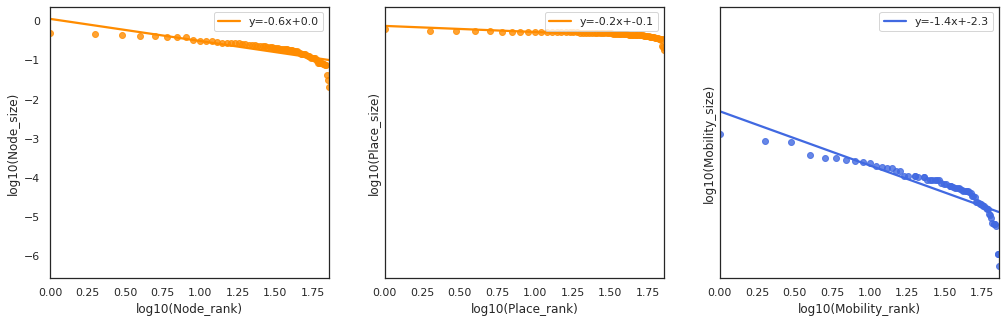

In [99]:
slope_n, intercept_n, r_value, pv, se = stats.linregress(gba_station['node_rank_ln'],gba_station['node_ln'])
slope_p, intercept_p, r_value, pv, se = stats.linregress(gba_station['place_rank_ln'],gba_station['place_ln'])
slope_m, intercept_m , r_value, pv, se= stats.linregress(gba_station['mobility_rank_ln'],gba_station['mobility_ln'])
sns.set_theme(style="white")
f, axs = plt.subplots(1,3,
                      figsize=(17,5),
                      sharey=True)
g1=sns.regplot(
    data=gba_station,
    x="node_rank_ln", y="node_ln",ci=None,fit_reg=True,color='darkorange',ax=axs[0], 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope_n,intercept_n)})
g2=sns.regplot(
    data=gba_station,
    x="place_rank_ln", y="place_ln",ci=None,fit_reg=True,color='darkorange',ax=axs[1], 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope_p,intercept_p)})
g3=sns.regplot(
    data=gba_station,
    x="mobility_rank_ln", y="mobility_ln",ci=None,fit_reg=True,color='royalblue',ax=axs[2], 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope_m,intercept_m)})
g1.set(xlabel='log10(Node_rank)', ylabel='log10(Node_size)')
g2.set(xlabel='log10(Place_rank)', ylabel='log10(Place_size)')
g3.set(xlabel='log10(Mobility_rank)', ylabel='log10(Mobility_size)')
g1.legend()
g2.legend()
g3.legend()

In [100]:
f.savefig("GBA_rank_size.png",dpi=300)

In [117]:
gz_station['node_rank']=gz_station['Node_index'].rank(method='max',ascending=False)
gz_station['place_rank']=gz_station['Place_inde'].rank(method='max',ascending=False)
gz_station['mobility_rank']=gz_station['mobility'].rank(method='max',ascending=False)
gz_station['settlement_rank']=gz_station['Settlement'].rank(method='max',ascending=False)
gz_station['container_rank']=gz_station['Container_'].rank(method='max',ascending=False)

In [118]:
gz_station['node_rank_ln']=np.log10(gz_station['node_rank'])
gz_station['place_rank_ln']=np.log10(gz_station['place_rank'])
gz_station['mobility_rank_ln']=np.log10(gz_station['mobility_rank'])
gz_station['settlement_rank_ln']=np.log10(gz_station['settlement_rank'])
gz_station['container_rank_ln']=np.log10(gz_station['container_rank'])
gz_station['node_ln']=np.log10(gz_station['Node_index'])
gz_station['place_ln']=np.log10(gz_station['Place_inde'])
gz_station['mobility_ln']=np.log10(gz_station['mobility'])
gz_station['settlement_ln']=np.log10(gz_station['Settlement'])
gz_station['container_ln']=np.log10(gz_station['Container_'])

/opt/conda/envs/sds2020/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [120]:
gz_station.replace([np.inf, -np.inf], np.nan, inplace=True)
gz_station.replace(np.nan,0, inplace=True)

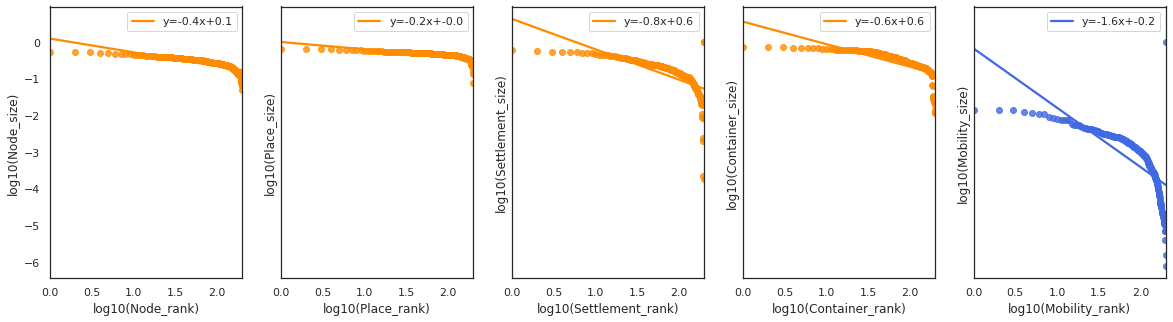

In [124]:
slope_n, intercept_n, r_value, pv, se = stats.linregress(gz_station['node_rank_ln'],gz_station['node_ln'])
slope_p, intercept_p, r_value, pv, se = stats.linregress(gz_station['place_rank_ln'],gz_station['place_ln'])
slope_m, intercept_m , r_value, pv, se= stats.linregress(gz_station['mobility_rank_ln'],gz_station['mobility_ln'])
slope_s, intercept_s, r_value, pv, se = stats.linregress(gz_station['settlement_rank_ln'],gz_station['settlement_ln'])
slope_c, intercept_c, r_value, pv, se = stats.linregress(gz_station['container_rank_ln'],gz_station['container_ln'])
sns.set_theme(style="white")
f, axes = plt.subplots(1,5,
                      figsize=(20,5),
                      sharey=True)
#axes[1][2].set_visible(False)

#axes[1][0].set_position([0.24,0.125,0.228,0.343])
#axes[1][1].set_position([0.55,0.125,0.228,0.343])
g1=sns.regplot(
    data=gz_station,
    x="node_rank_ln", y="node_ln",ci=None,fit_reg=True,color='darkorange',ax=axes[0],
    line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope_n,intercept_n)})
g2=sns.regplot(
    data=gz_station,
    x="place_rank_ln", y="place_ln",ci=None,fit_reg=True,color='darkorange',ax=axes[1], 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope_p,intercept_p)})
g3=sns.regplot(
    data=gz_station,
    x="settlement_rank_ln", y="settlement_ln",ci=None,fit_reg=True,color='darkorange',ax=axes[2], 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope_s,intercept_s)})
g4=sns.regplot(
    data=gz_station,
    x="container_rank_ln", y="container_ln",ci=None,fit_reg=True,color='darkorange',ax=axes[3], 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope_c,intercept_c)})
g5=sns.regplot(
    data=gz_station,
    x="mobility_rank_ln", y="mobility_ln",ci=None,fit_reg=True,color='royalblue',ax=axes[4], 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope_m,intercept_m)})
g1.set(xlabel='log10(Node_rank)', ylabel='log10(Node_size)')
g2.set(xlabel='log10(Place_rank)', ylabel='log10(Place_size)')
g3.set(xlabel='log10(Settlement_rank)', ylabel='log10(Settlement_size)')
g4.set(xlabel='log10(Container_rank)', ylabel='log10(Container_size)')
g5.set(xlabel='log10(Mobility_rank)', ylabel='log10(Mobility_size)')
g1.legend()
g2.legend()
g3.legend()
g4.legend()
g5.legend()

In [125]:
f.savefig("gz_rank_size.png",dpi=300)

In [136]:
gz_station=dg_station.copy()

In [137]:
gz_station['node_rank']=gz_station['Node_index'].rank(method='max',ascending=False)
gz_station['place_rank']=gz_station['Place_inde'].rank(method='max',ascending=False)
gz_station['mobility_rank']=gz_station['mobility'].rank(method='max',ascending=False)
gz_station['settlement_rank']=gz_station['Settlement'].rank(method='max',ascending=False)
gz_station['container_rank']=gz_station['Container_'].rank(method='max',ascending=False)

In [138]:
gz_station['node_rank_ln']=np.log10(gz_station['node_rank'])
gz_station['place_rank_ln']=np.log10(gz_station['place_rank'])
gz_station['mobility_rank_ln']=np.log10(gz_station['mobility_rank'])
gz_station['settlement_rank_ln']=np.log10(gz_station['settlement_rank'])
gz_station['container_rank_ln']=np.log10(gz_station['container_rank'])
gz_station['node_ln']=np.log10(gz_station['Node_index'])
gz_station['place_ln']=np.log10(gz_station['Place_inde'])
gz_station['mobility_ln']=np.log10(gz_station['mobility'])
gz_station['settlement_ln']=np.log10(gz_station['Settlement'])
gz_station['container_ln']=np.log10(gz_station['Container_'])
gz_station.replace([np.inf, -np.inf], np.nan, inplace=True)
gz_station.replace(np.nan,0, inplace=True)

/opt/conda/envs/sds2020/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


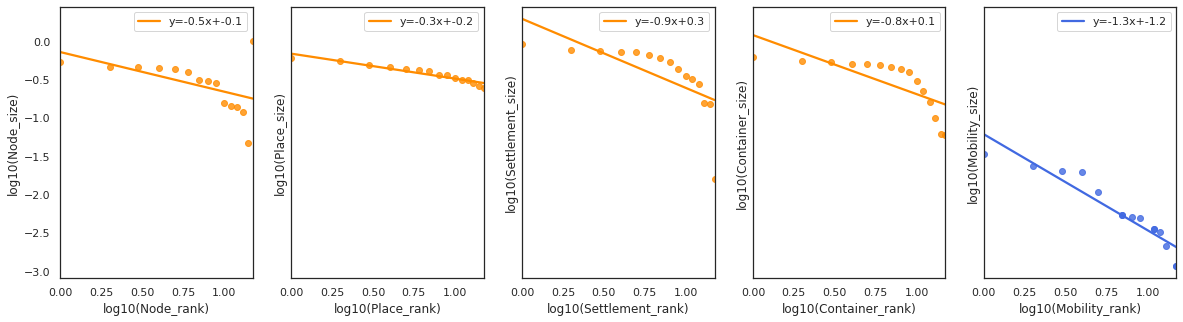

In [139]:
slope_n, intercept_n, r_value, pv, se = stats.linregress(gz_station['node_rank_ln'],gz_station['node_ln'])
slope_p, intercept_p, r_value, pv, se = stats.linregress(gz_station['place_rank_ln'],gz_station['place_ln'])
slope_m, intercept_m , r_value, pv, se= stats.linregress(gz_station['mobility_rank_ln'],gz_station['mobility_ln'])
slope_s, intercept_s, r_value, pv, se = stats.linregress(gz_station['settlement_rank_ln'],gz_station['settlement_ln'])
slope_c, intercept_c, r_value, pv, se = stats.linregress(gz_station['container_rank_ln'],gz_station['container_ln'])
sns.set_theme(style="white")
f, axes = plt.subplots(1,5,
                      figsize=(20,5),
                      sharey=True)
#axes[1][2].set_visible(False)

#axes[1][0].set_position([0.24,0.125,0.228,0.343])
#axes[1][1].set_position([0.55,0.125,0.228,0.343])
g1=sns.regplot(
    data=gz_station,
    x="node_rank_ln", y="node_ln",ci=None,fit_reg=True,color='darkorange',ax=axes[0],
    line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope_n,intercept_n)})
g2=sns.regplot(
    data=gz_station,
    x="place_rank_ln", y="place_ln",ci=None,fit_reg=True,color='darkorange',ax=axes[1], 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope_p,intercept_p)})
g3=sns.regplot(
    data=gz_station,
    x="settlement_rank_ln", y="settlement_ln",ci=None,fit_reg=True,color='darkorange',ax=axes[2], 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope_s,intercept_s)})
g4=sns.regplot(
    data=gz_station,
    x="container_rank_ln", y="container_ln",ci=None,fit_reg=True,color='darkorange',ax=axes[3], 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope_c,intercept_c)})
g5=sns.regplot(
    data=gz_station,
    x="mobility_rank_ln", y="mobility_ln",ci=None,fit_reg=True,color='royalblue',ax=axes[4], 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope_m,intercept_m)})
g1.set(xlabel='log10(Node_rank)', ylabel='log10(Node_size)')
g2.set(xlabel='log10(Place_rank)', ylabel='log10(Place_size)')
g3.set(xlabel='log10(Settlement_rank)', ylabel='log10(Settlement_size)')
g4.set(xlabel='log10(Container_rank)', ylabel='log10(Container_size)')
g5.set(xlabel='log10(Mobility_rank)', ylabel='log10(Mobility_size)')
g1.legend()
g2.legend()
g3.legend()
g4.legend()
g5.legend()

In [140]:
f.savefig("dg_rank_size.png",dpi=300)

In [165]:
##GWR
coord=np.column_stack([gba_station.to_crs(epsg=4326).geometry[0][0].x,gba_station.to_crs(epsg=4326).geometry[0][0].y])

In [164]:
gba_station.to_crs(epsg=4326).geometry[0][0].x

113.66829499765156

In [ ]:
y,X=patsy.dmatrices('standardize(mobility)~0 +standardize(Node_index)'
                                            '+standardize(Place_inde)'
                                            '+standardize(Settlement)'
                                            '+standardize(Container_)',data=gz_station)

In [170]:
y,X=patsy.dmatrices('standardize(mobility)~0 +standardize(Node_index)'
                                            '+standardize(Place_inde)',data=gba_station)

In [171]:
bw = mgwr.sel_bw.Sel_BW(coord,
                       np.asarray(y),
                       np.asarray(X),
                       fixed=False,
                       spherical=True)

In [172]:
bw.search()

ValueError: kth(=62) out of bounds (1)

In [173]:
model=mgwr.gwr.GWR(coord,
                  np.asarray(y),
                  np.asarray(X),
                  bw.bw[0])

AttributeError: 'Sel_BW' object has no attribute 'bw'